#Anime Recommendation system:


Anime Recommendation System :
recommends 10 related animes to the input title based on title, type and genre.

## Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')
anime=pd.read_csv('/content/drive/MyDrive/Project_dataset/anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## DATA:

*   7 columns: 'anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'

*  rows=12294



In [ ]:
print("Dataset, a glimpse:","\n Head\n",anime.head(),"\Tail: \n",anime.tail())

Dataset, a glimpse: 
 Head
    anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266   \Tail: 
        anime_id                                               name   genre  \
12289      9316       Toushinda

In [ ]:
print("Shape: ",anime.shape)
print("Columns:", anime.columns)

Shape:  (12294, 7)
Columns: Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


Check for null

In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Check datatypes

In [ ]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


<Axes: >

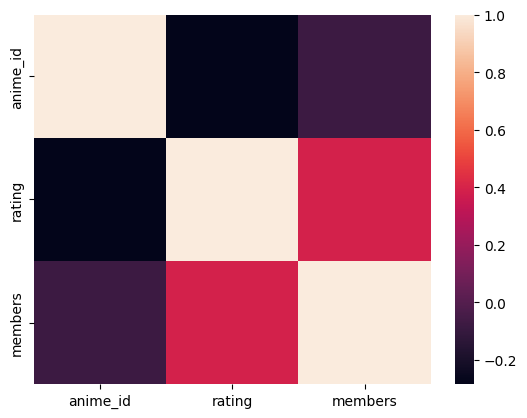

In [ ]:
sns.heatmap(anime.corr(numeric_only=True))

In [ ]:
#count of unique values in genre, type and episodes
lst=['genre','type','episodes']
for i in lst:
  print("\n.....................................................",i,"....................................................\n")
  print("VALUE:",anime[i].unique())
  print("COUNT:",anime[i].value_counts())




..................................................... genre ....................................................

VALUE: ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']
COUNT: genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Lif

In [ ]:
anime['episodes']=anime['episodes'].replace('Unknown',np.nan)
anime['episodes']=anime['episodes'].astype(float)

Text(0.5, 1.0, 'Type of anime')

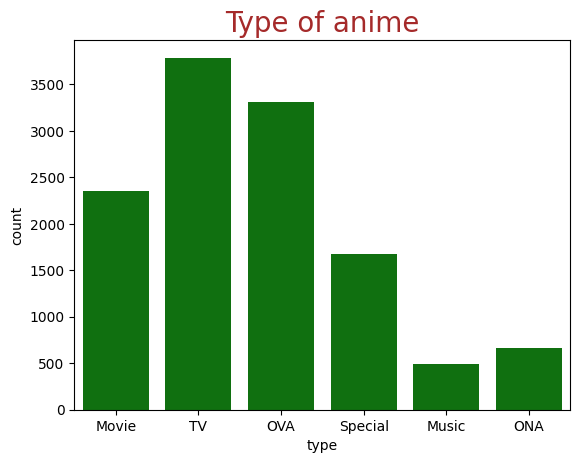

In [ ]:
sns.countplot(x='type',data=anime,color='g')
plot=plt.gca()
plot.set_title('Type of anime',fontsize=20,color='brown')

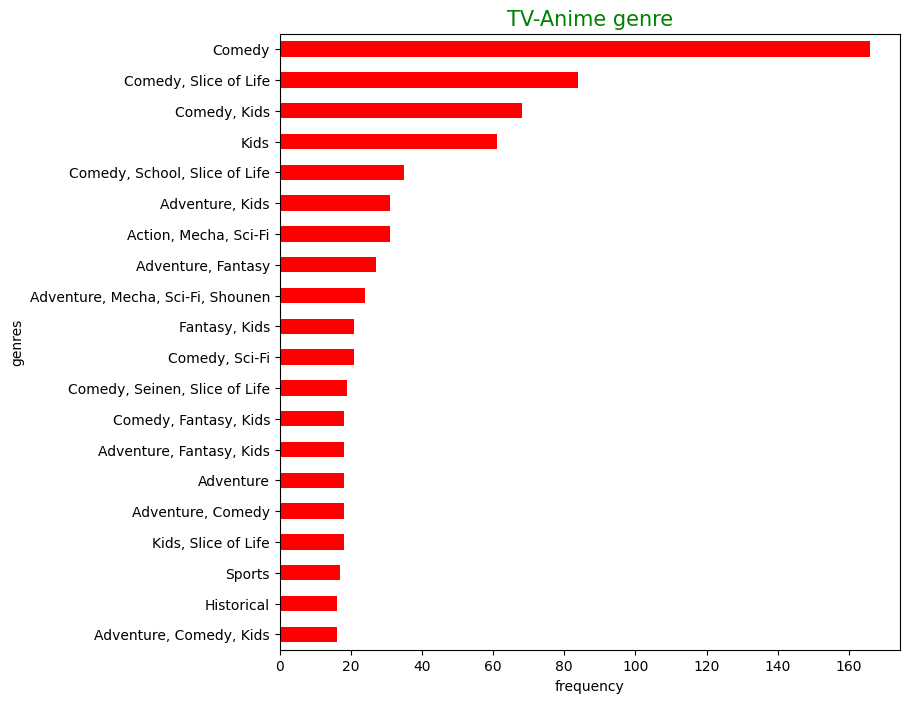

In [ ]:
TV_anime=anime[anime['type']=='TV']
TV_anime['genre'].value_counts().sort_values(ascending=True).tail(20).plot.barh(figsize=(8,8),color='r')
plt.title('TV-Anime genre',fontsize=15,color='g')
plt.xlabel('frequency')
plt.ylabel('genres')
plt.show()

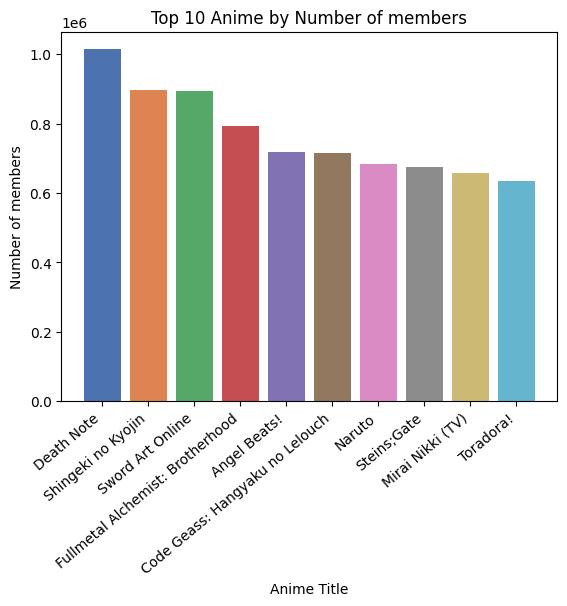

In [ ]:
#analysing the top 10 animes with respect to number of members
top=anime.sort_values(by='members',ascending=False).drop_duplicates(subset='name').head(10)
palette=sns.color_palette('deep',len(top))
plt.bar(top['name'],top['members'],color=palette)

plt.title("Top 10 Anime by Number of members")
plt.xlabel('Anime Title')
plt.ylabel('Number of members')
plt.xticks(rotation=40,ha='right')
plt.show()

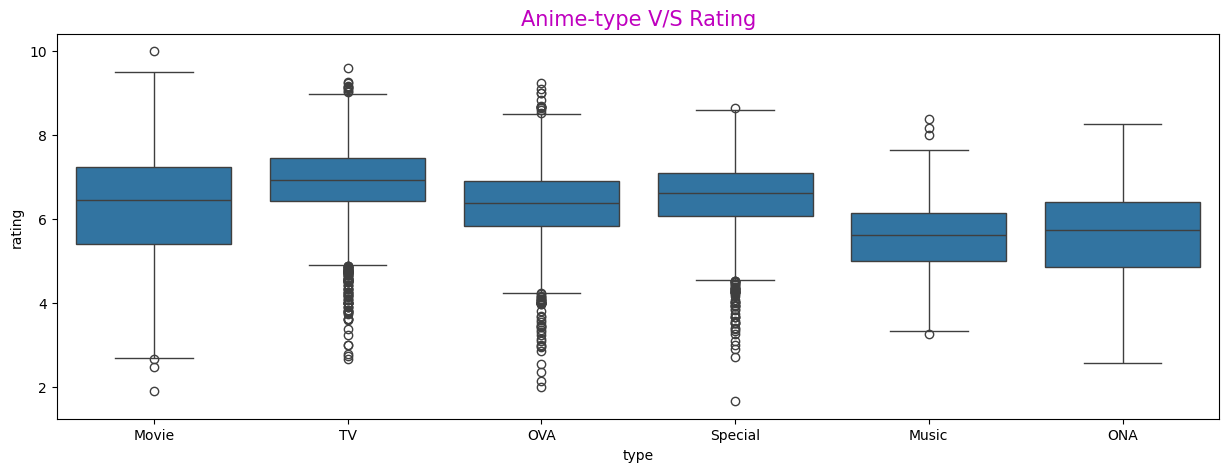

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='type',y='rating',data=anime)
plt.title('Anime-type V/S Rating',fontsize=15, color='m')
plt.show()

In [ ]:
#fill missing values for genre type and rating
anime['rating']=anime['rating'].fillna(anime['rating'].mean())
anime['genre']=anime['genre'].fillna(anime['genre'].mode()[0])
anime['type']=anime['type'].fillna(anime['type'].mode()[0])

In [ ]:
anime.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes    340
rating        0
members       0
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
x=anime.iloc[0]
x

anime_id                                   32281
name                              Kimi no Na wa.
genre       Drama, Romance, School, Supernatural
type                                       Movie
episodes                                     1.0
rating                                      9.37
members                                   200630
Name: 0, dtype: object

## Get column by concatenating genre and type

In [ ]:
def getString(row):
    result_string = row.genre+", "+row.type  # genre and type attributes of the row with a comma and space in between.
    result_string=result_string.replace(', ',' ')
    return  result_string
anime['string'] = anime.apply(getString,axis=1) #applies the get_string function to each row of the anime DataFrame to assigns the result to a new column named string in the anime DataFrame
anime.head()

,anime_id,name,genre,type,episodes,rating,members,string
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,Drama Romance School Supernatural Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,Sci-Fi Thriller TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,Action Comedy Historical Parody Samurai Sci-Fi...


## Vectorization: TF-IDF

In [ ]:
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
#fit the tfidf model to the string column and transforms it into a sparse matrix of TF-IDF features. 3000: Dimensionality Reduction,Performance Improvement:

In [ ]:
vector=tfidf.fit_transform(anime['string']) #all the anime's the TF-IDF vectors in the vector matrix.
vector.shape

(12294, 52)

## Movie to index

In [ ]:
animee2idx=pd.Series(anime.index,index=anime['name'])#creates a Pandas Series where the index is anime['name'] and the values are there indices
anime2idx

name
Kimi no Na wa.                                            0
Fullmetal Alchemist: Brotherhood                          1
Gintama°                                                  2
Steins;Gate                                               3
Gintama&#039;                                             4
                                                      ...  
Toushindai My Lover: Minami tai Mecha-Minami          12289
Under World                                           12290
Violence Gekiga David no Hoshi                        12291
Violence Gekiga Shin David no Hoshi: Inma Densetsu    12292
Yasuji no Pornorama: Yacchimae!!                      12293
Length: 12294, dtype: int64

## Define the recommendation function

  


> Recommendation System:
1. The recommended_anime_cosine function looks up the index of the given anime title.
2. If the title is not found, fuzzy matching is used to suggest a similar title.
3. If the index is a Series, the first element is used.
4. The cosine similarity between the TF-IDF vector of the given anime and all other animes is calculated.
5. The top 10 most similar animes are returned based on the similarity scores.

1.Try Block: Attempts to find the index of the provided title.


> **Input**: The function takes the user-provided title and tries to find the closest match to it from the list of anime names (anime['name'].tolist()).


List of Anime Names: ['Naruto', 'One Piece', 'Attack on Titan', ...] etc

2. Except Block: If a KeyError is raised i.e., the title is not found, it uses process.extract to find the closest match.



> **Fuzzy Matching**: It uses fuzzy string matching to compare the title against each anime name in the list.


matches = process.extract("Narutoo", ['Naruto', 'One Piece', 'Attack on Titan', ...], limit=1)

3.Check Match Score: If the similarity score of the closest match is 80 or above, it suggests the similar title. If no good match is found, it returns "Anime not found."
> **Output**: It returns a list of tuples, where each tuple contains a matched name and its corresponding similarity score. Since limit=1, it returns the best match.

[('Naruto', 90)] : 'Naruto' is the closest match with a similarity score of 90.

In [ ]:
def recommended_anime_cosine(title):
    try:
        idx=anime2idx[title]
    except:
        matches = process.extract(title, anime['name'].tolist(), limit=1) #fuzzy string matching to handle  inputs that does not exactly match any anime titles in the dataset.
        if matches and matches[0][1] >= 80:
            similar_name = matches[0][0]
            return f"Did you mean '{similar_name}'?"
        print("Anime Not Exist")
        return
    if isinstance(idx, pd.Series):
        idx=idx.iloc[0]
    #This line checks if idx is an instance of pd.Series, which is the data type for a Series in the Pandas library.
    #If idx is a Pandas Series, this line assigns idx the value of the first element in the Series.# iloc[0] is used to access the first element based on its integer position.
    selected_t=vector[idx]
    scores=cosine_similarity(selected_t,vector) #cosine similarity scores
    scores=scores.flatten() #1D array
    recommended_idx=(-scores).argsort()[1:11] # Sorts animes by their similarity to the given anime in descending order,including itself
    return anime['name'].iloc[recommended_idx]

Example:
Negated Scores: [-1.0, -0.95, -0.9, -0.85, ...] :(By default, the argsort() method sorts in ascending order. If you want the highest similarity scores first, need to reverse the order)
Sorted Indices: [0, 1, 2, 3, ...]
Selected Indices: [1, 2, 3, ..., 10] (skip 0)

In [ ]:
recommended_anime_cosine('Naruto')

615                                    Naruto: Shippuuden
841                                                Naruto
1343                                          Naruto x UT
1796                                       Rekka no Honoo
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
486                              Boruto: Naruto the Movie
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
6163                                            Wolverine
2852                                         Project ARMS
2342                               Kurokami The Animation
Name: name, dtype: object

Locally done in pycharm using Streamlit



```
#
from fuzzywuzzy import process
import pandas as pd
import streamlit as st
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the anime dataset
anime = pd.read_csv('datasepath of anime.csv')
anime["rating"] = anime["rating"].fillna(anime["rating"].mean())
anime["genre"] = anime["genre"].fillna(anime["genre"].mode()[0])
anime["type"] = anime["type"].fillna(anime["type"].mode()[0])

# Create the string feature for TF-IDF
def get_string(row):
    result_string = row.genre + ", " + row.type
    result_string = result_string.replace(', ', ' ')
    return result_string

anime['string'] = anime.apply(get_string, axis=1)

# Vectorize the string feature
tfidf = TfidfVectorizer(max_features=3000)
vector = tfidf.fit_transform(anime['string'])
#Series
anime2idx=pd.Series(anime.index,index=anime['name'])

#cosinesimilarity
def recommended_anime_cosine(title):
    try:
        idx = anime2idx[title]
    except KeyError:
        matches = process.extract(title, anime['name'].tolist(), limit=1)
        if matches and matches[0][1] >= 80:
            similar_name = matches[0][0]
            return f"Did you mean '{similar_name}'?"
        return "Anime not found."
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]
    qy = vector[idx]
    scores = cosine_similarity(qy, vector).flatten()
    recommended_idx = (-scores).argsort()[1:11]  
    return anime['name'].iloc[recommended_idx].tolist()

 # Define the Streamlit app
def main():
    st.title('Anime Recommendation System')
    options = anime['name'].tolist()
    text_input = st.selectbox('Select an Anime Title:', options)
    #text_input = st.text_input('Enter title:')
    if st.button('View Recommendations'):
        result = recommended_anime_cosine(text_input)
        with st.expander("Recommendations"):
            if isinstance(result, str):  # Check if the result is a string (error message)
                st.write(result)
            else:
                for anime_title in result:
                    st.write(anime_title)
    st.write("TOP 10 Animes:")
    st.image('path of top animes.png')
    st.write("Types of Animes:")
    st.image('path of types of animes.png')

if __name__ == "__main__":
    main()
```

